In [1]:
import requests
import jieba
import re
from bs4 import BeautifulSoup
import time
import random
from collections import Counter

In [2]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#print(matplotlib.matplotlib_fname())

### 前置作業

In [4]:
# 下載繁體辭典
!python -m wget https://github.com/fxsjy/jieba/raw/master/extra_dict/dict.txt.big -o jieba_data/dict.txt.big


Saved under jieba_data/dict.txt (1).big


In [5]:
# 載入stop word 
with open(file="jieba_data/stop_word.txt", mode="r", encoding="utf8") as f:
    stop_word_list = f.read().split("\n")

#stop_word_list    

In [6]:
# 指定辭典
jieba.set_dictionary('jieba_data/dict.txt.big')

### 爬取Yahoo財經新聞

In [7]:
# 使用selenium取得底層新聞(headless模式)
chrome_options = Options()
chrome_options.add_argument("--headless")
driver = Chrome("../../chromedriver", options=chrome_options)

url = "https://tw.news.yahoo.com/finance"
driver.get(url)
for _ in range(3):
    driver.execute_script("var s = document.documentElement.scrollTop=5000")
    time.sleep(2)

soup = BeautifulSoup(driver.page_source, features="html.parser")

# soup

In [8]:
# 頭版新聞 & 最多人瀏覽排行榜
main_urls = [i["href"] for i in soup.select("li[class='Pos(r) Lh(1.5) H(24px) Mb(8px)'] a")]

# 底部新聞(已排除廣告)
sub_urls = ["https://tw.news.yahoo.com" + i["href"] for i in soup.select("h3[class='Mb(5px)'] a")]

# 加總(去除不需要的網址)
total_urls = list(filter(lambda x:re.findall("https://tw.(news)|(stock).yahoo.com.*", x), main_urls+sub_urls))

# total_urls

In [9]:
# 抓取單篇新聞元素函式
def get_content(url):

    res = requests.get(url)
    soup = BeautifulSoup(res.text, features="html.parser")

    # title
    title = soup.select("header.caas-title-wrapper")
    print(title[0].text)

    # date & time
    date_time = soup.select("time.caas-attr-meta-time") #["datetime"]
    print(date_time[0]["datetime"])

    # content
    content = soup.select('div.caas-body')[0].text

    return content


In [10]:
output = ""
for url in total_urls:
    output += get_content(url)
    sleep_time =random.randint(1, 4)
    print("="*30 + "Sleep {} sec".format(sleep_time) + "="*30)
    time.sleep(sleep_time)
    

台股站上萬八歷史新高 內外資加碼面板雙虎逾8.4萬張
2021-07-15T11:05:10.000Z
==============================Sleep 4 sec==============================
眾聲大數據：台股上市櫃股票聲量排名前50強(7/15)
2021-07-15T15:13:48.000Z
==============================Sleep 3 sec==============================
30幾歲月薪2、3萬是魯蛇？ 他養「8貓1龜1狗」曝心聲
2021-07-15T09:29:52.000Z
==============================Sleep 3 sec==============================
從「指標Ｋ線」判讀 台股第三季行情墊高
2021-07-15T09:14:28.000Z
==============================Sleep 4 sec==============================
台股站上萬八新高 下半年靠科技電子歸隊助攻多頭
2021-07-15T08:55:29.000Z
==============================Sleep 4 sec==============================
航海王、鋼鐵人復活 台股攻高擒萬八
2021-07-15T08:24:40.000Z
==============================Sleep 1 sec==============================
女股神：比特幣對環境衝擊的擔憂是暫時的 長期仍看漲
2021-07-15T08:10:04.000Z
==============================Sleep 1 sec==============================
台股攻克萬八創新高 外資連4日大買 三大法人買超154.25億元
2021-07-15T07:00:45.000Z
==============================Sleep 4 sec==============================
新唐前5月純益達5.99億元 賺贏去年

### 分詞&文字雲

In [11]:
# 分詞
seg_words_list = jieba.lcut(output)
seg_words_list[:20]

Building prefix dict from C:\Users\Tibame\PycharmProjects\PythonETL\small projects\Yahoo Finance New (Wordcloud)\jieba_data\dict.txt.big ...
Loading model from cache C:\Users\Tibame\AppData\Local\Temp\jieba.ue3efd7727330b37f4d1a667978d72592.cache
Loading model cost 2.972 seconds.
Prefix dict has been built successfully.


['台股',
 '在',
 '電子',
 '傳產',
 '聯手',
 '拉',
 '抬下',
 '攻上',
 ' ',
 '18034.19',
 ' ',
 '點',
 '歷史',
 '新高',
 '，',
 '三大',
 '法人',
 '買超',
 ' ',
 '154.25']

In [12]:
# 過濾停用字
filtered_words = list()
for word in seg_words_list:
    if word not in stop_word_list:
        filtered_words.append(word)
        
seg_counter = Counter(filtered_words)

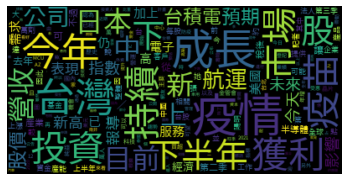

In [13]:
#繪製文字雲(依據字頻)
wordcloud = WordCloud(font_path='fonts/TaipeiSansTCBeta-Regular.ttf').generate_from_frequencies(seg_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()